<a href="https://colab.research.google.com/github/Charlotte-99/Y3Project/blob/main/Official_CMB_Map_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Maps from the Real Cosmic Microwave Background
In this notebook, we will be extracting cutouts from THE Cosmic Microwave Background. 

## Importing modules and data

In [1]:
# Change directory to project folder
import os
os.chdir('/content/drive/My Drive/Project')

In [2]:
!pip install healpy

     |████████████████████████████████| 15.8MB 239kB/s 


In [3]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

## Importing and plotting the map
The map is a .fits file. We can use Healpy to load and preview the map. 

In [4]:
map = hp.fitsfunc.read_map('COM_CMB_IQU-smica_2048_R3.00_full.fits')
cmap = ListedColormap(np.loadtxt('planck_map.txt')/255.)

/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/usr/local/lib/python3.7/dist-packages/healpy/fitsfunc.py:428: UserWarn

Below is a plot of the map, where we've set the minimum and maximum values of the colourmap to be -300 microK and 300 microK respectively. Note the galactic plane at the central region of the map. When we extract cutouts, we should be careful to avoid this region and it doesn't produce reliable data.

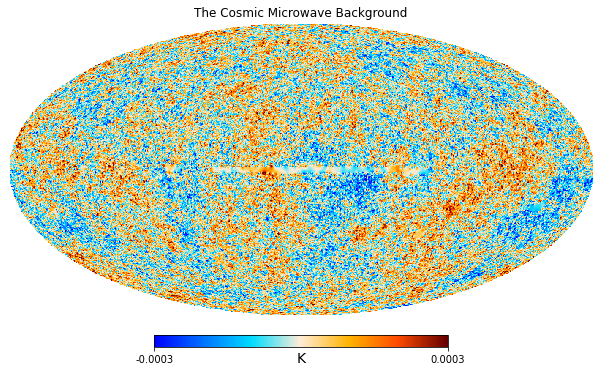

In [26]:
hp.mollview(map, title='The Cosmic Microwave Background', unit='K', cmap=cmap,
            min=-300e-6, max=300e-6)

## Previewing cutouts
In this section we will just look at different cutouts from the CMB map. This is mainly to find the bounds of the region we should avoid (i.e. the galactic plane). 

We will be taking 5x5 degree cutouts at a resolution of 1.5 arcmin.

Here we plot a cutout centred at lon = 0, lat = 0. This is in the galactic plane, hence why part of the image is blurred.

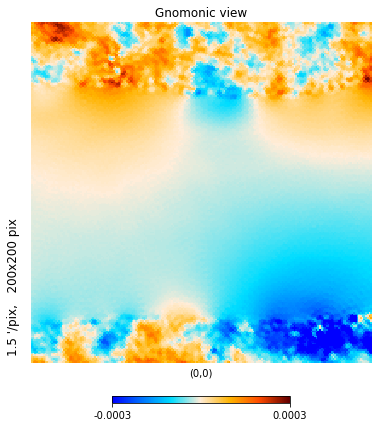

In [23]:
hp.visufunc.gnomview(map, rot=(0, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)

We now plot a cutout centered at lon = 0, lat = 5. At this point, there is no blurry section of the cutout.

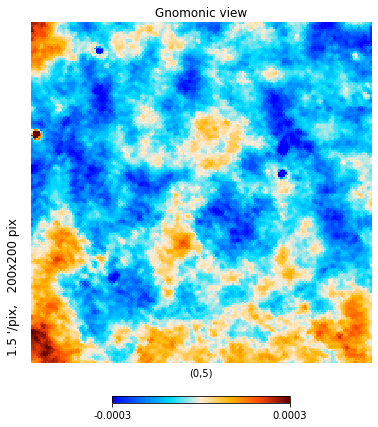

In [46]:
hp.visufunc.gnomview(map, rot=(0, 5, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)

Here, we plot two cutouts. The first one is centred at (lon, lat) = (20, 0) whilst the second is centred at (20, 5). Again, there are no blurry sections once centered at 5 degrees. However, it is important to note the blurry section is not uniform in height. 

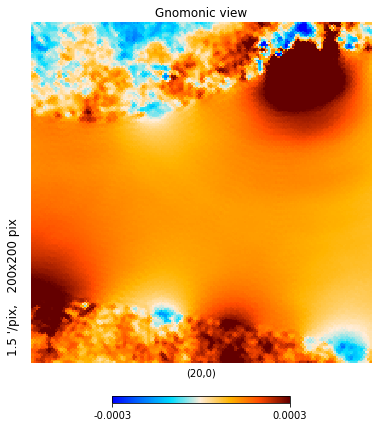

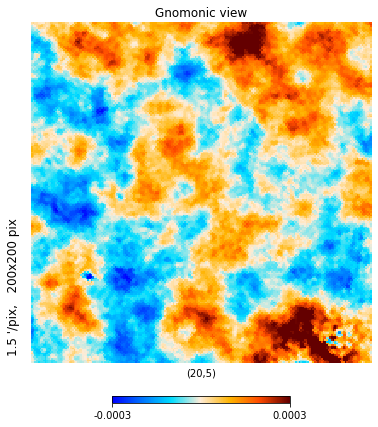

In [34]:
hp.visufunc.gnomview(map, rot=(20, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)

hp.visufunc.gnomview(map, rot=(20, 5, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)

These four cutouts are centred at (-90, 0), (90, 0), (-120, 0), (120, 0).

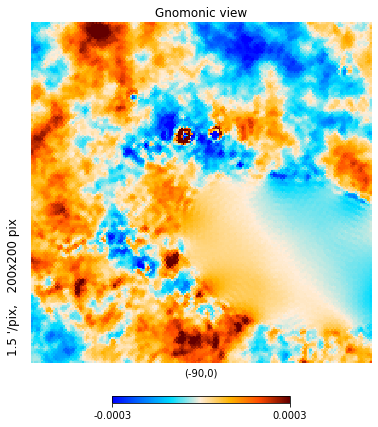

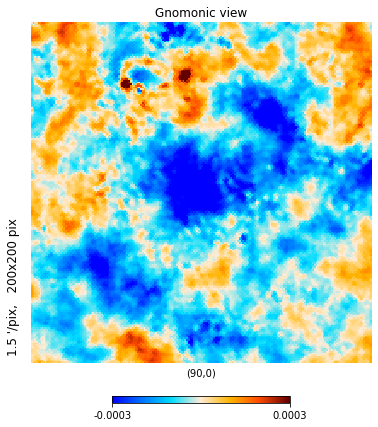

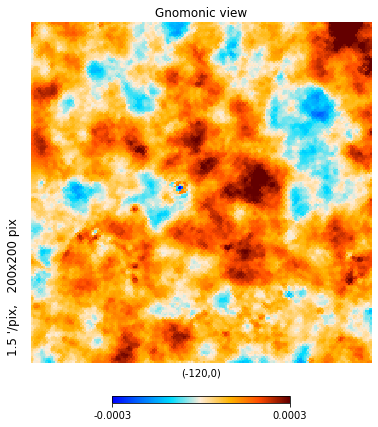

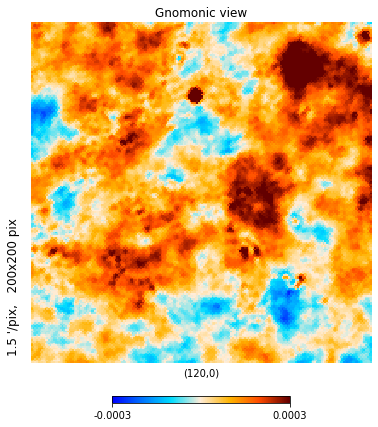

In [47]:
hp.visufunc.gnomview(map, rot=(-90, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)
hp.visufunc.gnomview(map, rot=(90, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)
hp.visufunc.gnomview(map, rot=(-120, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)
hp.visufunc.gnomview(map, rot=(120, 0, 0), xsize=200,
                     reso=1.5, return_projected_map=False,
                      no_plot=False, cmap=cmap, min=-300e-6, max=300e-6)

More systematically, here we plot images centred at lat=0 and lon from -180 to 180.

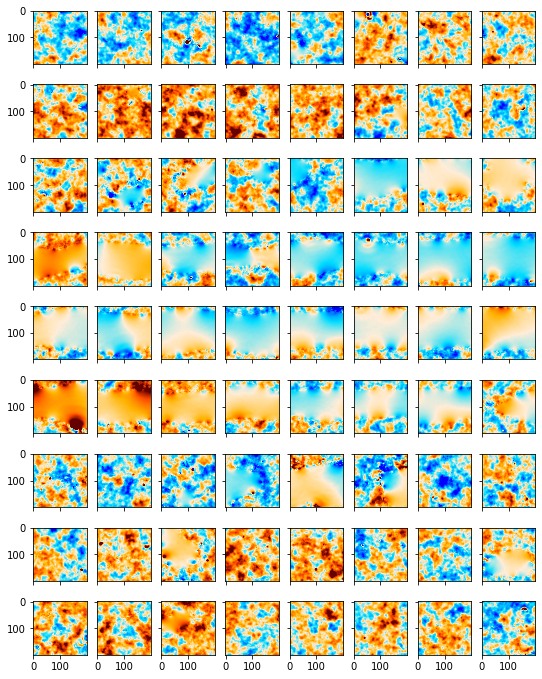

In [52]:
fig, axes = plt.subplots(9, 8, figsize=(9, 12),
                         sharex=True, sharey=True)
lon_list = np.arange(-180, 180, 5)
lat = 0

for n, lon in enumerate(lon_list):
  cutout = hp.visufunc.gnomview(map, rot=(lon, lat, 0), xsize=200,
                     reso=1.5, return_projected_map=True,
                      no_plot=True)
  axes.flat[n].imshow(cutout, cmap=cmap, vmin=-300e-6, vmax=300e-6)
  

Similarly, we do the same except with latitude centred at 5.

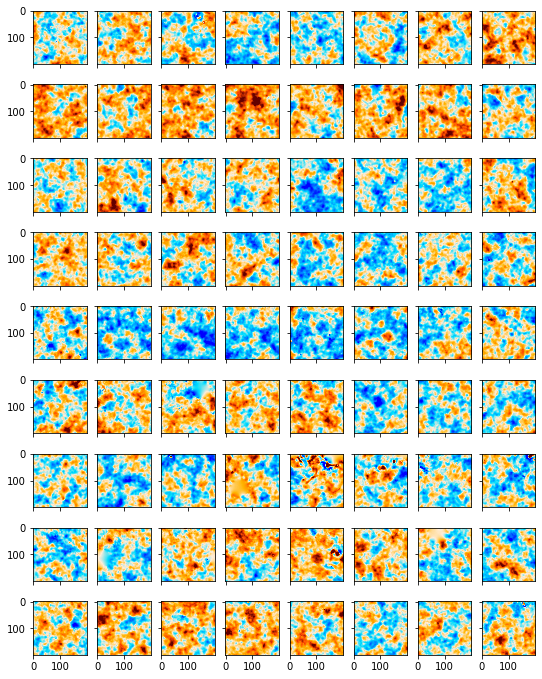

In [53]:
fig, axes = plt.subplots(9, 8, figsize=(9, 12),
                         sharex=True, sharey=True)
lon_list = np.arange(-180, 180, 5)
lat = 5

for n, lon in enumerate(lon_list):
  cutout = hp.visufunc.gnomview(map, rot=(lon, lat, 0), xsize=200,
                     reso=1.5, return_projected_map=True,
                      no_plot=True)
  axes.flat[n].imshow(cutout, cmap=cmap, vmin=-300e-6, vmax=300e-6)
  

And latitude centred at -5.

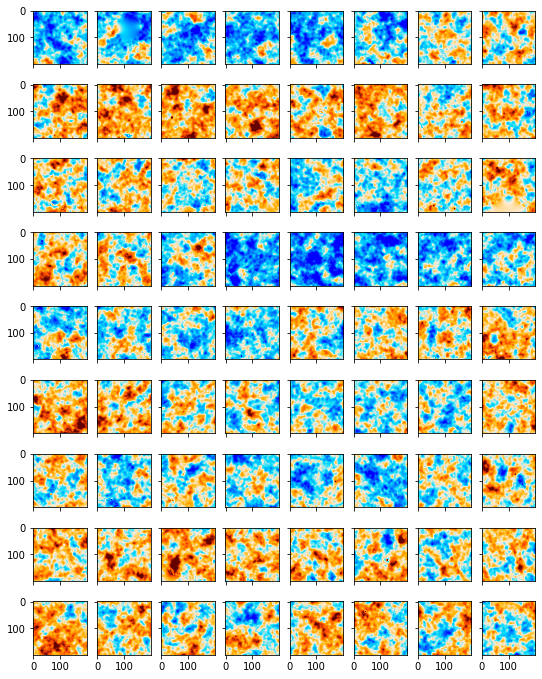

In [54]:
fig, axes = plt.subplots(9, 8, figsize=(9, 12),
                         sharex=True, sharey=True)
lon_list = np.arange(-180, 180, 5)
lat = -5

for n, lon in enumerate(lon_list):
  cutout = hp.visufunc.gnomview(map, rot=(lon, lat, 0), xsize=200,
                     reso=1.5, return_projected_map=True,
                      no_plot=True)
  axes.flat[n].imshow(cutout, cmap=cmap, vmin=-300e-6, vmax=300e-6)
  

As we can see in some images, we still have some blurriness or strange defects in the images. It might be better to move to +10 and -10 latitude.

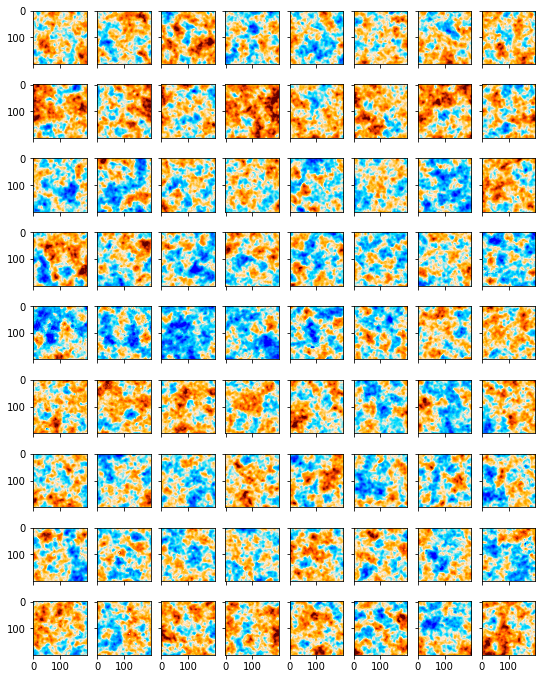

In [55]:
fig, axes = plt.subplots(9, 8, figsize=(9, 12),
                         sharex=True, sharey=True)
lon_list = np.arange(-180, 180, 5)
lat = 10

for n, lon in enumerate(lon_list):
  cutout = hp.visufunc.gnomview(map, rot=(lon, lat, 0), xsize=200,
                     reso=1.5, return_projected_map=True,
                      no_plot=True)
  axes.flat[n].imshow(cutout, cmap=cmap, vmin=-300e-6, vmax=300e-6)
  

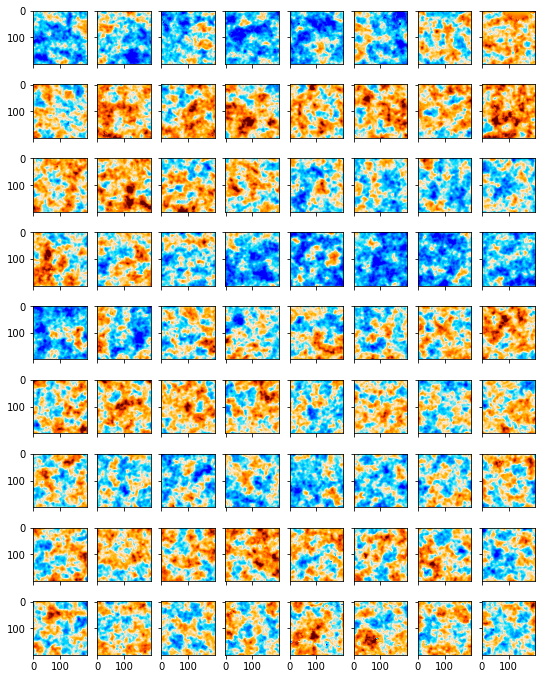

In [56]:
fig, axes = plt.subplots(9, 8, figsize=(9, 12),
                         sharex=True, sharey=True)
lon_list = np.arange(-180, 180, 5)
lat = -10

for n, lon in enumerate(lon_list):
  cutout = hp.visufunc.gnomview(map, rot=(lon, lat, 0), xsize=200,
                     reso=1.5, return_projected_map=True,
                      no_plot=True)
  axes.flat[n].imshow(cutout, cmap=cmap, vmin=-300e-6, vmax=300e-6)
  

I think a safe region to extract cutouts from (to avoid the galactic plane) would be anywhere with latitudes not in the region -10 to 10.

## Extracting cutouts

In [60]:
def extract_map(map, rot, deg_side, pixel_side):
  ''' This function extracts a map with shape (pixel_side, pixel_side) of a 
  deg_side x deg_side degree squared region from a map. 

  @params:
  map         a healpy map
  rot         a tuple (lon, lat, psi) where lon, lat specify where the
              centre of the extracted map will be and psi specifies a rotation.
              All in units of degrees.
  deg_side    number of degrees the side of the extracted map corresponds to
  pixel_side  size of the image side in pixels
  '''
  reso = 60*deg_side/pixel_side
  mini_map = hp.visufunc.gnomview(map, rot=rot, xsize=pixel_side,
                                  reso=reso, return_projected_map=True,
                                  no_plot=True)
  return mini_map